<a href="https://colab.research.google.com/github/larissavvsous/InteligenciaArtificial/blob/main/Desafio_IA_Nuven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://keep.google.com/u/0/media/v2/1KEOykpDCdncFAKvek6BP1xuMMz0OeLRT87Q9Pu70Awroxq7AFj_quSeQXfjN8g/1AeC8SsNa4JqMtoij5botwAmmEYHJ_oQC3O1jvl3wXEuMsp5MSaZZ68fEFBJzBJ4?accept=image%2Fgif%2Cimage%2Fjpeg%2Cimage%2Fjpg%2Cimage%2Fpng%2Caudio%2Faac&sz=537" alt="Descrição da Imagem" width="130" height="80">

# Desafio Técnico: Inteligência Artificial
### Link do código no GitHub: `https://github.com/larissavvsous/Inteligencia_Artificial`
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importação das Bibliotecas Necessárias

In [ ]:
import pandas as pd  # criação do dataset
import os  # interação com o sistema operacional, manipulando caminhos de arquivos e diretórios
import cv2  # OpenCV para processamento de imagens e visão computacional
import matplotlib.pyplot as plt  # visualização das imagens

!pip install mtcnn opencv-python # instalação das bibliotecas MTCNN e OpenCV

from mtcnn import MTCNN  # detecta rostos em imagens
from sklearn.model_selection import train_test_split  # divide o dataset em treino e teste

## Carregamento e Visualização de Imagens

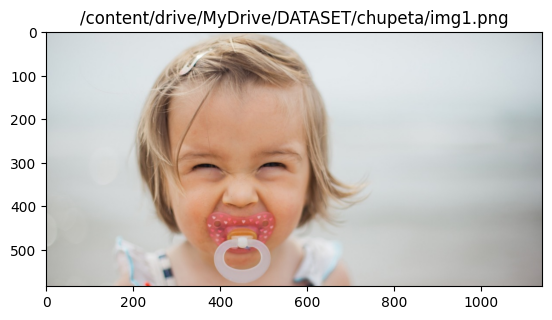

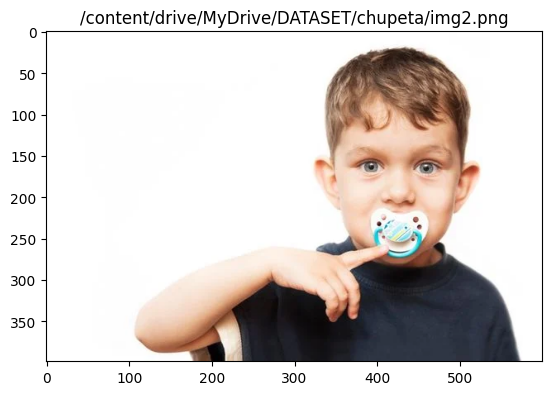

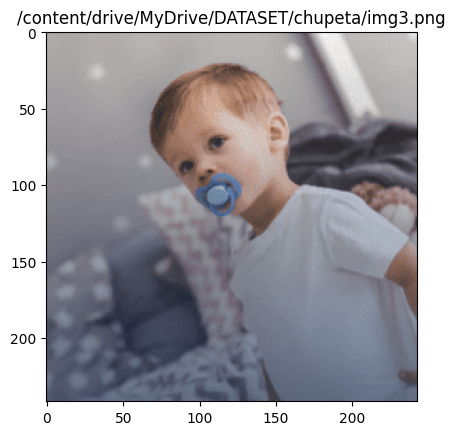

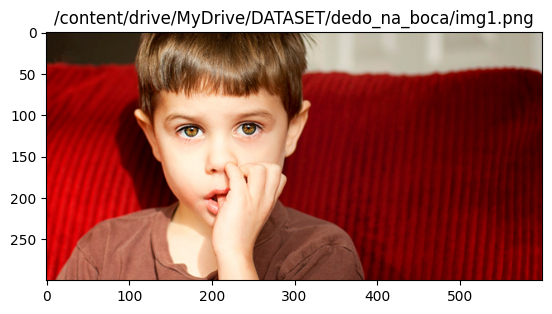

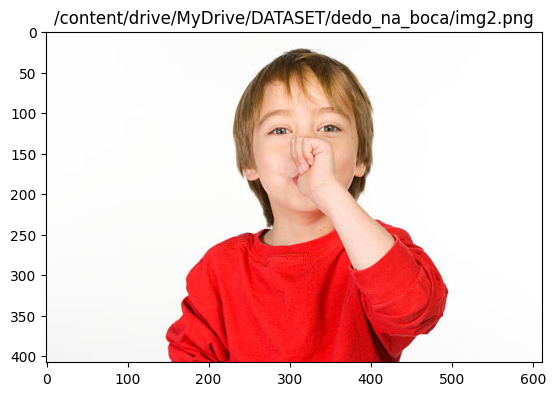

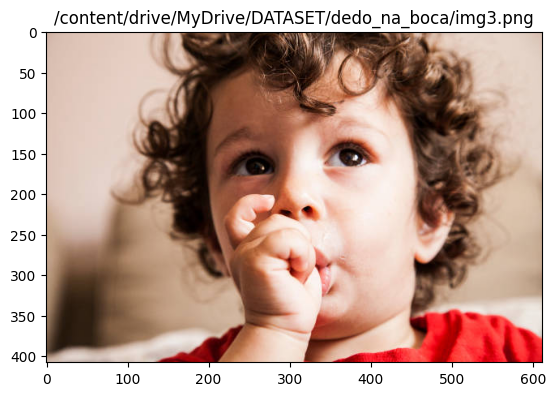

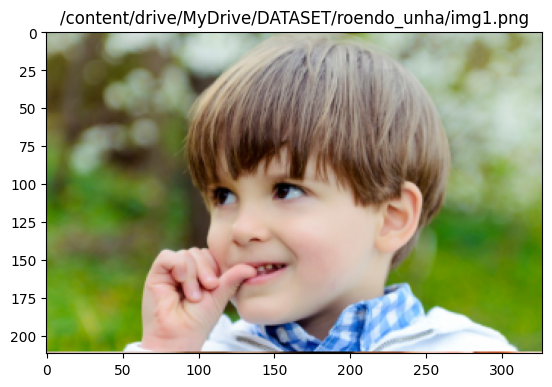

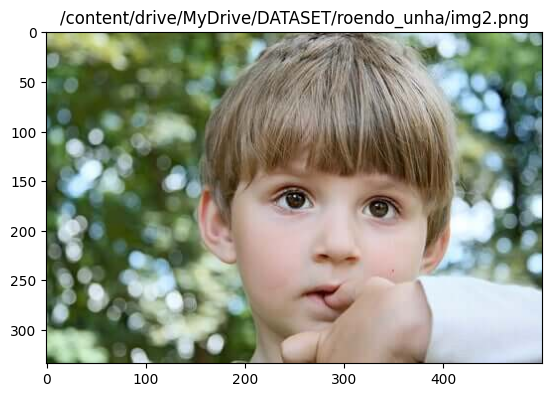

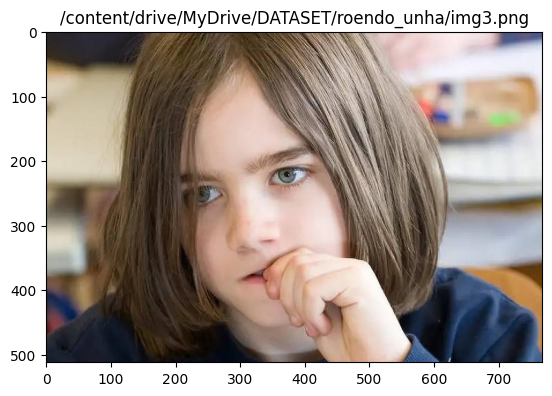

In [ ]:
def carregar_e_visualizar_imagens(pastas_imagens):
    imagens = []
    caminhos_imagens = []

    for pasta in pastas_imagens:
        imagens_pasta = []
        caminhos_imagens_pasta = [os.path.join(pasta, img) for img in os.listdir(pasta)]

        for caminho_img in caminhos_imagens_pasta:
            img = cv2.imread(caminho_img)
            if img is not None:
                imagens_pasta.append(img)
            else:
                print(f"Erro ao ler imagem: {caminho_img}")

        imagens.extend(imagens_pasta)
        caminhos_imagens.extend(caminhos_imagens_pasta)

        for img, caminho_img in zip(imagens_pasta, caminhos_imagens_pasta):
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(caminho_img)
            plt.show()

    return imagens, caminhos_imagens

# Diretórios onde as imagens estão armazenadas
pasta_imagens_chupeta = '/content/drive/MyDrive/DATASET/chupeta'
pasta_imagens_dedo = '/content/drive/MyDrive/DATASET/dedo_na_boca'
pasta_imagens_roendo = '/content/drive/MyDrive/DATASET/roendo_unha'

# Visualizando as imagens:
imagens, caminhos_imagens = carregar_e_visualizar_imagens([pasta_imagens_chupeta, pasta_imagens_dedo, pasta_imagens_roendo])


## Detecção de Faces
#### Algoritmo de detecção de faces `MTCNN`

In [ ]:
def detectar_faces(imagens):
    detector = MTCNN()
    faces = []

    for img in imagens:
        resultado = detector.detect_faces(img)
        if resultado:
            # Armazenar todas as faces detectadas
            caixas_faces = [r['box'] for r in resultado]
            faces.append(caixas_faces)
        else:
            faces.append([])  # Lista vazia se nenhuma face for detectada

    return faces

def carregar_imagens(caminhos_imagens):
    imagens = []
    for caminho in caminhos_imagens:
        imagem = cv2.imread(caminho)
        imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
        imagens.append(imagem_rgb)
    return imagens

# Caminhos onde as imagens estão armazenadas
caminhos_imagens = [
    '/content/drive/MyDrive/DATASET/chupeta/img1.png',
    '/content/drive/MyDrive/DATASET/chupeta/img2.png',
    '/content/drive/MyDrive/DATASET/chupeta/img3.png',
    '/content/drive/MyDrive/DATASET/dedo_na_boca/img1.png',
    '/content/drive/MyDrive/DATASET/dedo_na_boca/img2.png',
    '/content/drive/MyDrive/DATASET/dedo_na_boca/img3.png',
    '/content/drive/MyDrive/DATASET/roendo_unha/img1.png',
    '/content/drive/MyDrive/DATASET/roendo_unha/img2.png',
    '/content/drive/MyDrive/DATASET/roendo_unha/img3.png'
]

imagens = carregar_imagens(caminhos_imagens) # Carregar as imagens
faces = detectar_faces(imagens) # Detectar faces
print("\n\nCoordenadas da ROI da face:")
faces

1/1 [==============================] - 0s 29ms/step


Coordenadas da ROI da face:


[[[277, 138, 332, 446]],
 [[347, 93, 151, 186]],
 [[76, 45, 67, 76]],
 [[131, 38, 156, 202]],
 [[250, 54, 127, 162]],
 [[220, 46, 242, 324]],
 [[107, 62, 102, 127]],
 [[192, 89, 190, 235]],
 [[196, 112, 268, 327]]]

## Criar arquivo CSV

In [ ]:
dados = []

descricoes = {
    '/content/drive/MyDrive/DATASET/chupeta/img1.png': ("Criança de olhos escuros e cabelos claros, com chupeta rosa na boca", "Criança de olhos escuros e cabelos claros, com chupeta rosa na boca e fundo desfocado cinza"),
    '/content/drive/MyDrive/DATASET/chupeta/img2.png': ("Criança de olhos claros e cabelo escuro, com chupeta branca na boca", "Criança de olhos claros e cabelo escuro, com chupeta branca na boca, dedo na chupeta, com camisa azul e fundo branco"),
    '/content/drive/MyDrive/DATASET/chupeta/img3.png': ("Criança de olhos escuros e cabelos claros, com chupeta azul na boca", "Criança de olhos escuros e cabelos claros, com chupeta azul na boca, perto do sofá"),
    '/content/drive/MyDrive/DATASET/dedo_na_boca/img1.png': ("Criança de olhos e cabelos claros, com o dedo na boca e no nariz", "Criança de olhos e cabelos claros, com o dedo na boca e no nariz, com camisa marrom, sentado no sofá vermelho"),
    '/content/drive/MyDrive/DATASET/dedo_na_boca/img2.png': ("Criança de olhos e cabelos claros, com o dedo na boca", "Criança de olhos e cabelos claros, com o dedo na boca, com camisa vermelha, parede branca"),
    '/content/drive/MyDrive/DATASET/dedo_na_boca/img3.png': ("Criança de olhos e cabelo cacheado escuros, com dedo na boca", "Criança de olhos e cabelo cacheado escuros, com dedo na boca, com camisa vermelha, fundo desfocado"),
    '/content/drive/MyDrive/DATASET/roendo_unha/img1.png': ("Criança de olhos e cabelo cacheado escuros, roendo unha", "Criança de olhos e cabelos escuros, roendo unha, camisa azul e fundo desfocado verde"),
    '/content/drive/MyDrive/DATASET/roendo_unha/img2.png': ("Criança de olhos escuros e cabelo claro, roendo unha", "Criança de olhos escuros e cabelo claro, roendo unha, com camisa branca e fundo desfocado verde"),
    '/content/drive/MyDrive/DATASET/roendo_unha/img3.png': ("Criança de olhos claros e cabelo escuro, roendo unha", "Criança de olhos claros e cabelo escuro, roendo unha, com camisa azul e fundo desfocado")
}

# Preencher os dados com os caminhos das imagens e as coordenadas das faces
for caminho_img, caixas_faces in zip(caminhos_imagens, faces):
    for caixa in caixas_faces:
        x, y, largura, altura = caixa
        coordenadas_roi = f"{x},{y},{x+largura},{y+altura}"

        if caminho_img in descricoes:
            descricao_roi, descricao_imagem = descricoes[caminho_img]
        else:
            descricao_roi = "Criança com chupeta"
            descricao_imagem = "Criança com chupeta"

        dados.append([caminho_img, coordenadas_roi, descricao_roi, descricao_imagem])

    if not caixas_faces:
        if caminho_img in descricoes:
            descricao_roi, descricao_imagem = descricoes[caminho_img]
        else:
            descricao_roi = "Nenhuma face detectada"
            descricao_imagem = "Nenhuma face detectada"

        dados.append([caminho_img, "Nenhuma face detectada", descricao_roi, descricao_imagem])

# Colunas: 'Caminho da Imagem', 'Coordenadas do ROI', 'Descrição do ROI', 'Descrição da Imagem'
df = pd.DataFrame(dados, columns=['Image Path', 'ROI Coordenadas', 'ROI Caption', 'Image Caption'])

# Salvar em CSV
caminho_csv = 'dataset_faces.csv'
df.to_csv(caminho_csv, index=False)
df


,Image Path,ROI Coordenadas,ROI Caption,Image Caption
0,/content/drive/MyDrive/DATASET/chupeta/img1.png,"277,138,609,584","Criança de olhos escuros e cabelos claros, com...","Criança de olhos escuros e cabelos claros, com..."
1,/content/drive/MyDrive/DATASET/chupeta/img2.png,"347,93,498,279","Criança de olhos claros e cabelo escuro, com c...","Criança de olhos claros e cabelo escuro, com c..."
2,/content/drive/MyDrive/DATASET/chupeta/img3.png,"76,45,143,121","Criança de olhos escuros e cabelos claros, com...","Criança de olhos escuros e cabelos claros, com..."
3,/content/drive/MyDrive/DATASET/dedo_na_boca/im...,"131,38,287,240","Criança de olhos e cabelos claros, com o dedo ...","Criança de olhos e cabelos claros, com o dedo ..."
4,/content/drive/MyDrive/DATASET/dedo_na_boca/im...,"250,54,377,216","Criança de olhos e cabelos claros, com o dedo ...","Criança de olhos e cabelos claros, com o dedo ..."
5,/content/drive/MyDrive/DATASET/dedo_na_boca/im...,"220,46,462,370","Criança de olhos e cabelo cacheado escuros, co...","Criança de olhos e cabelo cacheado escuros, co..."
6,/content/drive/MyDrive/DATASET/roendo_unha/img...,"107,62,209,189","Criança de olhos e cabelo cacheado escuros, ro...","Criança de olhos e cabelos escuros, roendo unh..."
7,/content/drive/MyDrive/DATASET/roendo_unha/img...,"192,89,382,324","Criança de olhos escuros e cabelo claro, roend...","Criança de olhos escuros e cabelo claro, roend..."
8,/content/drive/MyDrive/DATASET/roendo_unha/img...,"196,112,464,439","Criança de olhos claros e cabelo escuro, roend...","Criança de olhos claros e cabelo escuro, roend..."


## Preparação para Treinamento

In [ ]:
# Dividir os dados em treino e teste
X = df[['Image Path']]  # caminho da imagem
Y = df[['ROI Caption']]  # descrição da ROI

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Tamanho do conjunto de")
print(f"\nTreino: {len(X_train)} amostras")
print(f"\nTeste: {len(X_test)} amostras")

print("\n\nComo os dados estão divididos")
print("\nConjunto de treino:")
print("\n", X_train)
print("\n", Y_train)

print("\n\nConjunto de teste:")
print("\n", X_test)
print("\n", Y_test)

Tamanho do conjunto de

Treino: 7 amostras

Teste: 2 amostras


Como os dados estão divididos

Conjunto de treino:

                                           Image Path
5  /content/drive/MyDrive/DATASET/dedo_na_boca/im...
0    /content/drive/MyDrive/DATASET/chupeta/img1.png
8  /content/drive/MyDrive/DATASET/roendo_unha/img...
2    /content/drive/MyDrive/DATASET/chupeta/img3.png
4  /content/drive/MyDrive/DATASET/dedo_na_boca/im...
3  /content/drive/MyDrive/DATASET/dedo_na_boca/im...
6  /content/drive/MyDrive/DATASET/roendo_unha/img...

                                          ROI Caption
5  Criança de olhos e cabelo cacheado escuros, co...
0  Criança de olhos escuros e cabelos claros, com...
8  Criança de olhos claros e cabelo escuro, roend...
2  Criança de olhos escuros e cabelos claros, com...
4  Criança de olhos e cabelos claros, com o dedo ...
3  Criança de olhos e cabelos claros, com o dedo ...
6  Criança de olhos e cabelo cacheado escuros, ro...


Conjunto de teste:

           